In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
import matplotlib.font_manager as fm
import matplotlib

font_path = 'C:/Windows/Fonts/gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

In [129]:
import warnings
warnings.filterwarnings('ignore')

### labeled.csv에서 버려야할 컬럼
- _id
- TimeStamp
- PART_FACT_PLAN_DATE
- PART_FACT_SERIAL
- EQUIP_CD
- Barrel_Temperature_7
- Mold_Temperature_1
- Mold_Temperature_2
- Mold_Temperature_5
- Mold_Temperature_6
- Mold_Temperature_7
- Mold_Temperature_8
- Mold_Temperature_9
- Mold_Temperature_10
- Mold_Temperature_11
- Mold_Temperature_12


**Reason 컬럼은 변형해야함 ERR_FACT_QTY**

In [130]:
labeled_df = pd.read_csv('./labeled_data.csv', encoding='utf-8')
unlabeled_df = pd.read_csv('./unlabeled_data.csv', index_col=0, encoding='utf-8')

In [131]:
# 필요없다고 판단되는 컬럼 drop
dropped_labeled_df = labeled_df.drop([
    '_id', 'TimeStamp', 'PART_FACT_PLAN_DATE',
    'PART_FACT_SERIAL', 'EQUIP_CD', 'Barrel_Temperature_7',
    'Mold_Temperature_1', 'Mold_Temperature_2', 'Mold_Temperature_5',
    'Mold_Temperature_6', 'Mold_Temperature_7', 'Mold_Temperature_8',
    'Mold_Temperature_9', 'Mold_Temperature_10', 'Mold_Temperature_11',
    'Mold_Temperature_12'
    ], axis=1
)
dropped_labeled_df

,PART_NAME,EQUIP_NAME,PassOrFail,Reason,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
0,CN7 W/S SIDE MLD'G RH,650톤-우진2호기,Y,NaN,9.59,4.47,16.920000,59.520000,7.13,653.409973,...,59.299999,276.500000,274.700012,274.799988,269.200012,255.000000,229.699997,66.300003,24.799999,27.500000
1,CN7 W/S SIDE MLD'G RH,650톤-우진2호기,Y,NaN,9.60,4.48,16.910000,59.580002,7.13,653.409973,...,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,67.199997,24.799999,27.600000
2,CN7 W/S SIDE MLD'G LH,650톤-우진2호기,Y,NaN,9.60,4.48,16.910000,59.580002,7.13,653.409973,...,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,67.199997,24.799999,27.600000
3,CN7 W/S SIDE MLD'G LH,650톤-우진2호기,Y,NaN,9.59,4.48,16.910000,59.560001,7.13,653.419983,...,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,66.900002,25.000000,27.600000
4,CN7 W/S SIDE MLD'G RH,650톤-우진2호기,Y,NaN,9.59,4.48,16.910000,59.560001,7.13,653.419983,...,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,66.900002,25.000000,27.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7991,CN7 W/S SIDE MLD'G LH,650톤-우진2호기,Y,NaN,9.60,4.48,16.620001,59.560001,7.11,653.429993,...,59.900002,276.500000,274.899994,275.100006,269.500000,255.600006,229.600006,66.099998,21.000000,22.400000
7992,CN7 W/S SIDE MLD'G RH,650톤-우진2호기,Y,NaN,9.60,4.48,16.650000,59.560001,7.11,653.429993,...,59.900002,275.799988,275.299988,275.500000,270.700012,254.899994,230.000000,66.099998,21.000000,22.400000
7993,CN7 W/S SIDE MLD'G LH,650톤-우진2호기,Y,NaN,9.60,4.48,16.650000,59.560001,7.11,653.429993,...,59.900002,275.799988,275.299988,275.500000,270.700012,254.899994,230.000000,66.099998,21.000000,22.400000
7994,CN7 W/S SIDE MLD'G LH,650톤-우진2호기,Y,NaN,9.60,4.48,16.629999,59.580002,7.11,653.429993,...,59.900002,276.100006,275.799988,275.000000,271.299988,255.100006,230.199997,65.199997,21.000000,22.299999


In [132]:
# 필요없다고 판단되는 컬럼 drop
dropped_unlabeled_df = unlabeled_df.drop([
    '_id', 'TimeStamp', 'PART_FACT_PLAN_DATE',
    'PART_FACT_SERIAL', 'EQUIP_CD', 'Barrel_Temperature_7',
    'Mold_Temperature_1', 'Mold_Temperature_2', 'Mold_Temperature_5',
    'Mold_Temperature_6', 'Mold_Temperature_7', 'Mold_Temperature_8',
    'Mold_Temperature_9', 'Mold_Temperature_10', 'Mold_Temperature_11',
    'Mold_Temperature_12'
    ], axis=1
)
dropped_unlabeled_df['Max_Switch_Over_Pressure'].value_counts()

Max_Switch_Over_Pressure
69.9     40438
70.0     37379
69.8     34574
69.7     27741
70.1     26711
         ...  
13.1         1
148.5        1
151.5        1
150.1        1
56.1         1
Name: count, Length: 1327, dtype: int64

In [133]:
# ERR_FACT_QTY의 값이 중앙값 5이상이면 PassOrFail이 0인 값으로 변환
dropped_unlabeled_df['ERR_FACT_QTY'] = np.where(dropped_unlabeled_df['ERR_FACT_QTY'] > 5, '0', '1')
err_ch_unlabeled_df = dropped_unlabeled_df
err_ch_unlabeled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 795315 entries, 0 to 795314
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   PART_NO                   795315 non-null  object 
 1   PART_NAME                 795315 non-null  object 
 2   EQUIP_NAME                795315 non-null  object 
 3   ERR_FACT_QTY              795315 non-null  object 
 4   Injection_Time            795315 non-null  float64
 5   Filling_Time              795315 non-null  float64
 6   Plasticizing_Time         795315 non-null  float64
 7   Cycle_Time                795315 non-null  float64
 8   Clamp_Close_Time          795315 non-null  float64
 9   Cushion_Position          795315 non-null  float64
 10  Switch_Over_Position      795315 non-null  float64
 11  Plasticizing_Position     795315 non-null  float64
 12  Clamp_Open_Position       795315 non-null  float64
 13  Max_Injection_Speed       795315 non-null  float6

In [134]:
# EQUIP_NAME 원핫인코딩 (인코딩후 EQUIP_NAME 컬럼을 drop하지는 않았음음)
one_hot_equip_name = pd.get_dummies(err_ch_unlabeled_df['EQUIP_NAME'])

err_ch_unlabeled_df = pd.concat([err_ch_unlabeled_df, one_hot_equip_name], axis=1)

# True, False로 저장되어서 1, 0으로 변경
oh_unlabeled_df = err_ch_unlabeled_df.replace({True: 1, False: 0})
oh_unlabeled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 795315 entries, 0 to 795314
Data columns (total 42 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   PART_NO                   795315 non-null  object 
 1   PART_NAME                 795315 non-null  object 
 2   EQUIP_NAME                795315 non-null  object 
 3   ERR_FACT_QTY              795315 non-null  object 
 4   Injection_Time            795315 non-null  float64
 5   Filling_Time              795315 non-null  float64
 6   Plasticizing_Time         795315 non-null  float64
 7   Cycle_Time                795315 non-null  float64
 8   Clamp_Close_Time          795315 non-null  float64
 9   Cushion_Position          795315 non-null  float64
 10  Switch_Over_Position      795315 non-null  float64
 11  Plasticizing_Position     795315 non-null  float64
 12  Clamp_Open_Position       795315 non-null  float64
 13  Max_Injection_Speed       795315 non-null  float6

In [135]:
# PART_NAME 원핫인코딩 (PART_NAME을 drop 하지는 않았음)
one_hot_part_name = pd.get_dummies(err_ch_unlabeled_df['PART_NAME'])

oh_unlabeled_df = pd.concat([oh_unlabeled_df, one_hot_part_name], axis=1)

# True, False로 저장되어서 1, 0으로 변경
oh_unlabeled_df = oh_unlabeled_df.replace({True: 1, False: 0})
oh_unlabeled_df

,PART_NO,PART_NAME,EQUIP_NAME,ERR_FACT_QTY,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,...,TL SIDE STEP TRIM LH,TL SIDE STEP TRIM RH,TM SIDE STEP TRIM LH,TM SIDE STEP TRIM RH,UM SIDE STEP TRIM LH,UM SIDE STEP TRIM RH,UPPER SHELL (HEV사양),UPPER SHELL(Gamma2-T),X61G FRT,X61G RR
0,87285Q5000,"SP2 CVR ROOF RACK CTR, RH",1800TON-우진,0,3.18,2.66,13.14,0.00,12.30,9.9,...,0,0,0,0,0,0,0,0,0,0
1,87275Q5000,"SP2 CVR ROOF RACK CTR, LH",1800TON-우진,0,16.29,2.78,13.72,0.00,12.50,9.0,...,0,0,0,0,0,0,0,0,0,0
2,87285Q5000,"SP2 CVR ROOF RACK CTR, RH",1800TON-우진,0,16.29,2.78,13.72,0.00,12.50,9.0,...,0,0,0,0,0,0,0,0,0,0
3,87275Q5000,"SP2 CVR ROOF RACK CTR, LH",1800TON-우진,0,16.28,2.78,12.74,81.38,12.77,8.7,...,0,0,0,0,0,0,0,0,0,0
4,87285Q5000,"SP2 CVR ROOF RACK CTR, RH",1800TON-우진,0,16.28,2.78,12.74,81.38,12.77,8.7,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795310,84721G9000,IK PNL C/PAD MAIN LHD,3300TON-우진,1,12.09,4.58,14.40,83.00,11.38,8.7,...,0,0,0,0,0,0,0,0,0,0
795311,86141S8900,LX2 W/S SIDE MLD'G RH(RHD),650톤-우진,1,11.47,3.36,20.01,64.28,6.04,655.0,...,0,0,0,0,0,0,0,0,0,0
795312,87275Q5000,"SP2 CVR ROOF RACK CTR, LH",1800TON-우진,1,16.34,3.03,10.67,66.82,5.85,11.7,...,0,0,0,0,0,0,0,0,0,0
795313,87285Q5000,"SP2 CVR ROOF RACK CTR, RH",1800TON-우진,1,16.34,3.03,10.67,66.82,5.85,11.7,...,0,0,0,0,0,0,0,0,0,0


In [136]:
# csv로 저장
# oh_unlabeled_df.to_csv('./new.csv', encoding='utf-8')

In [137]:
# 모든 컬럼 히트맵
# corr_matrix = oh_unlabeled_df.corr(numeric_only=True)

# plt.subplots(figsize=(100, 100))
# sns.heatmap(corr_matrix, annot=True, cmap='Blues')
# plt.show()

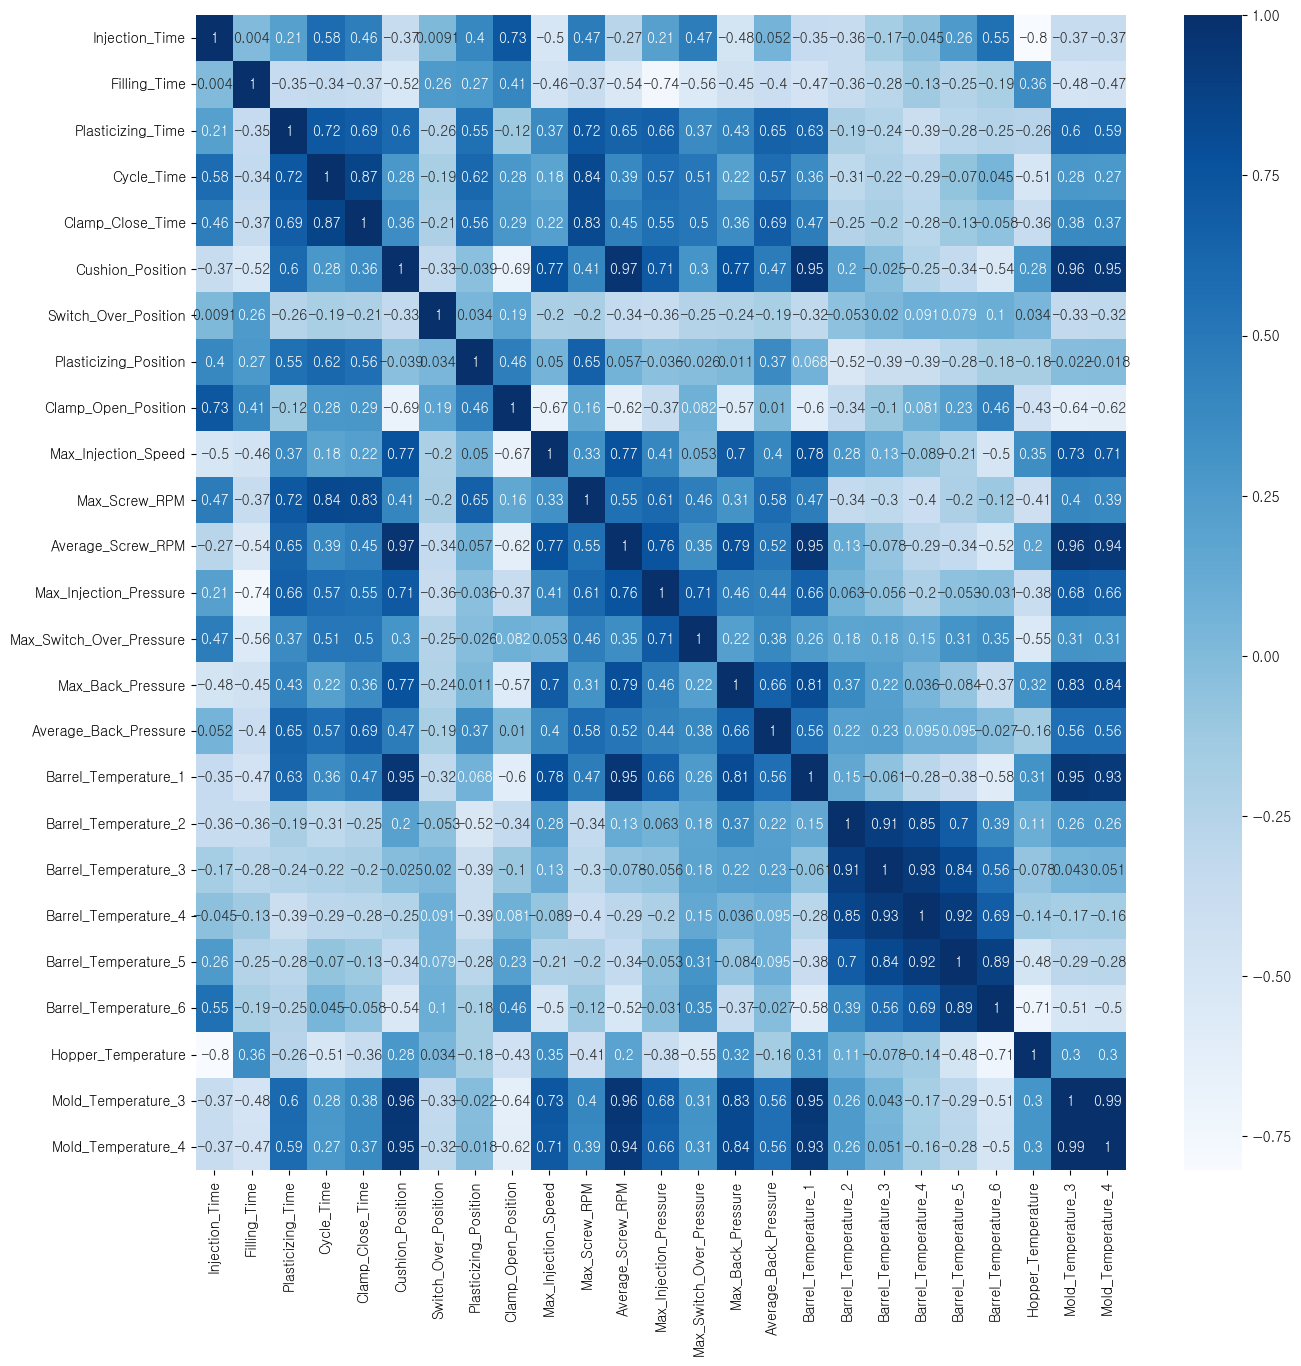

In [138]:
# Mold_Temperatue 까지만 히트맵
corr = oh_unlabeled_df.iloc[:,:29].corr(numeric_only=True)

plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

In [139]:
final_df = pd.read_csv('./final_labeled_data.csv', index_col=0)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 803311 entries, 0 to 795314
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   PART_NAME                 803311 non-null  object 
 1   EQUIP_NAME                803311 non-null  object 
 2   PassOrFail                803311 non-null  object 
 3   Injection_Time            803311 non-null  float64
 4   Filling_Time              803311 non-null  float64
 5   Plasticizing_Time         803311 non-null  float64
 6   Cycle_Time                803311 non-null  float64
 7   Clamp_Close_Time          803311 non-null  float64
 8   Cushion_Position          803311 non-null  float64
 9   Switch_Over_Position      803311 non-null  float64
 10  Plasticizing_Position     803311 non-null  float64
 11  Clamp_Open_Position       803311 non-null  float64
 12  Max_Injection_Speed       803311 non-null  float64
 13  Max_Screw_RPM             803311 non-null  float6

In [140]:
outlier_counts = {}

for col in final_df.iloc[:,3:28]:  # 숫자형 컬럼만 선택
    Q1 = final_df[col].quantile(0.25)
    Q3 = final_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = final_df[(final_df[col] < lower_bound) | (final_df[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 803311 entries, 0 to 795314
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   PART_NAME                 803311 non-null  object 
 1   EQUIP_NAME                803311 non-null  object 
 2   PassOrFail                803311 non-null  object 
 3   Injection_Time            803311 non-null  float64
 4   Filling_Time              803311 non-null  float64
 5   Plasticizing_Time         803311 non-null  float64
 6   Cycle_Time                803311 non-null  float64
 7   Clamp_Close_Time          803311 non-null  float64
 8   Cushion_Position          803311 non-null  float64
 9   Switch_Over_Position      803311 non-null  float64
 10  Plasticizing_Position     803311 non-null  float64
 11  Clamp_Open_Position       803311 non-null  float64
 12  Max_Injection_Speed       803311 non-null  float64
 13  Max_Screw_RPM             803311 non-null  float6

In [159]:
outlier_clear_final_df = final_df.select_dtypes(include=[np.number])

for col in outlier_clear_final_df:
    Q1 = outlier_clear_final_df[col].quantile(0.25)
    Q3 = outlier_clear_final_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outlier_clear_final_df[col] = np.where(outlier_clear_final_df[col] < lower_bound, lower_bound, outlier_clear_final_df[col])
    outlier_clear_final_df[col] = np.where(outlier_clear_final_df[col] > upper_bound, upper_bound, outlier_clear_final_df[col])

outlier_clear_final_df

,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
0,9.59,4.47,16.92,59.520000,7.13,653.409973,0.0,68.849998,647.98999,55.400002,...,59.299999,276.500000,274.25,274.799988,269.200012,255.000000,229.699997,66.300003,24.799999,27.5
1,9.60,4.48,16.91,59.580002,7.13,653.409973,0.0,68.839996,647.98999,55.299999,...,59.299999,276.200012,274.25,275.299988,270.799988,254.699997,229.500000,67.199997,24.799999,27.6
2,9.60,4.48,16.91,59.580002,7.13,653.409973,0.0,68.839996,647.98999,55.299999,...,59.299999,276.200012,274.25,275.299988,270.799988,254.699997,229.500000,67.199997,24.799999,27.6
3,9.59,4.48,16.91,59.560001,7.13,653.419983,0.0,68.839996,647.98999,55.299999,...,59.299999,276.500000,274.25,275.399994,271.100006,254.899994,230.000000,66.900002,25.000000,27.6
4,9.59,4.48,16.91,59.560001,7.13,653.419983,0.0,68.839996,647.98999,55.299999,...,59.299999,276.500000,274.25,275.399994,271.100006,254.899994,230.000000,66.900002,25.000000,27.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795310,12.09,4.58,14.40,83.000000,11.38,8.700000,18.0,97.900000,1479.85000,41.600000,...,49.300000,0.000000,252.25,256.650000,257.100000,232.300000,211.300000,63.000000,0.000000,0.0
795311,11.47,3.36,20.01,64.280000,6.04,655.000000,0.0,59.820000,69.64000,64.600000,...,13.700000,245.500000,252.25,256.650000,257.100000,240.000000,225.200000,39.000000,20.200000,23.6
795312,16.34,3.03,10.67,66.820000,5.85,11.700000,10.0,59.900000,883.80000,22.400000,...,26.900000,0.000000,264.10,270.400000,270.100000,270.000000,265.600000,0.000000,0.000000,0.0
795313,16.34,3.03,10.67,66.820000,5.85,11.700000,10.0,59.900000,883.80000,22.400000,...,26.900000,0.000000,264.10,270.400000,270.100000,270.000000,265.600000,0.000000,0.000000,0.0


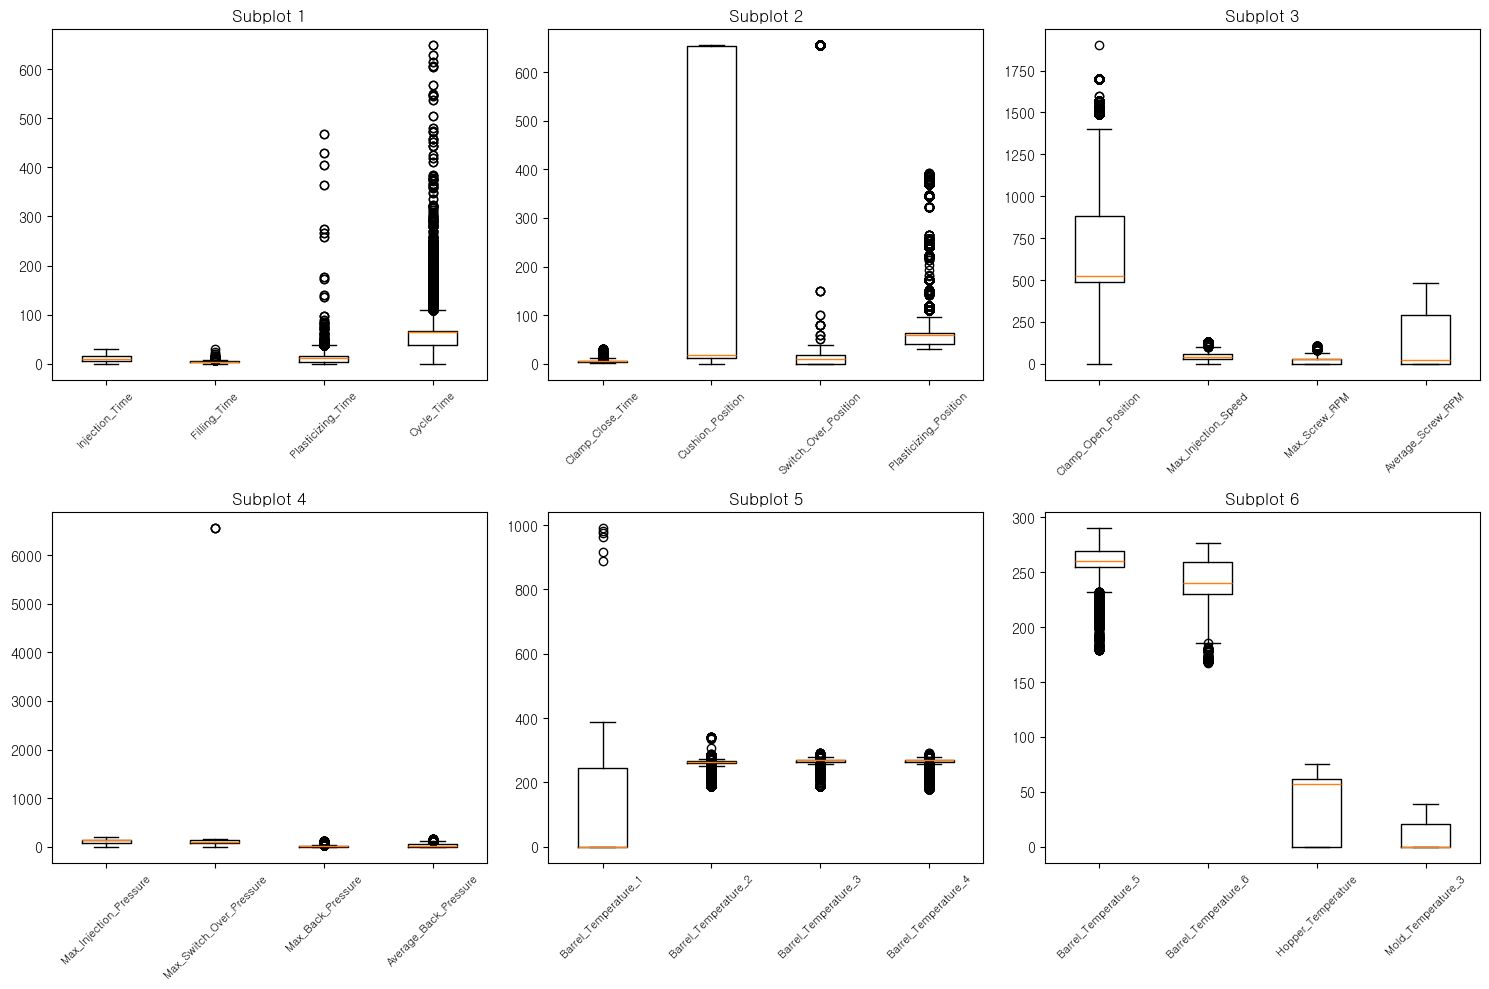

In [156]:
# boxplot으로 이상치 탐색

subset = final_df.iloc[:,3:29]

subset = subset.apply(pd.to_numeric, errors='coerce')

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, ax in enumerate(axes):
    start_idx = i * 4
    end_idx = start_idx + 4
    cols = subset.columns[start_idx:end_idx]
    
    data = [subset[col].dropna() for col in cols]
    
    ax.boxplot(data)
    
    ax.set_xticks(range(1, len(cols)+1))
    ax.set_xticklabels(cols, rotation=45, fontsize=8)
    ax.set_title(f'Subplot {i+1}')


plt.tight_layout()
plt.show()

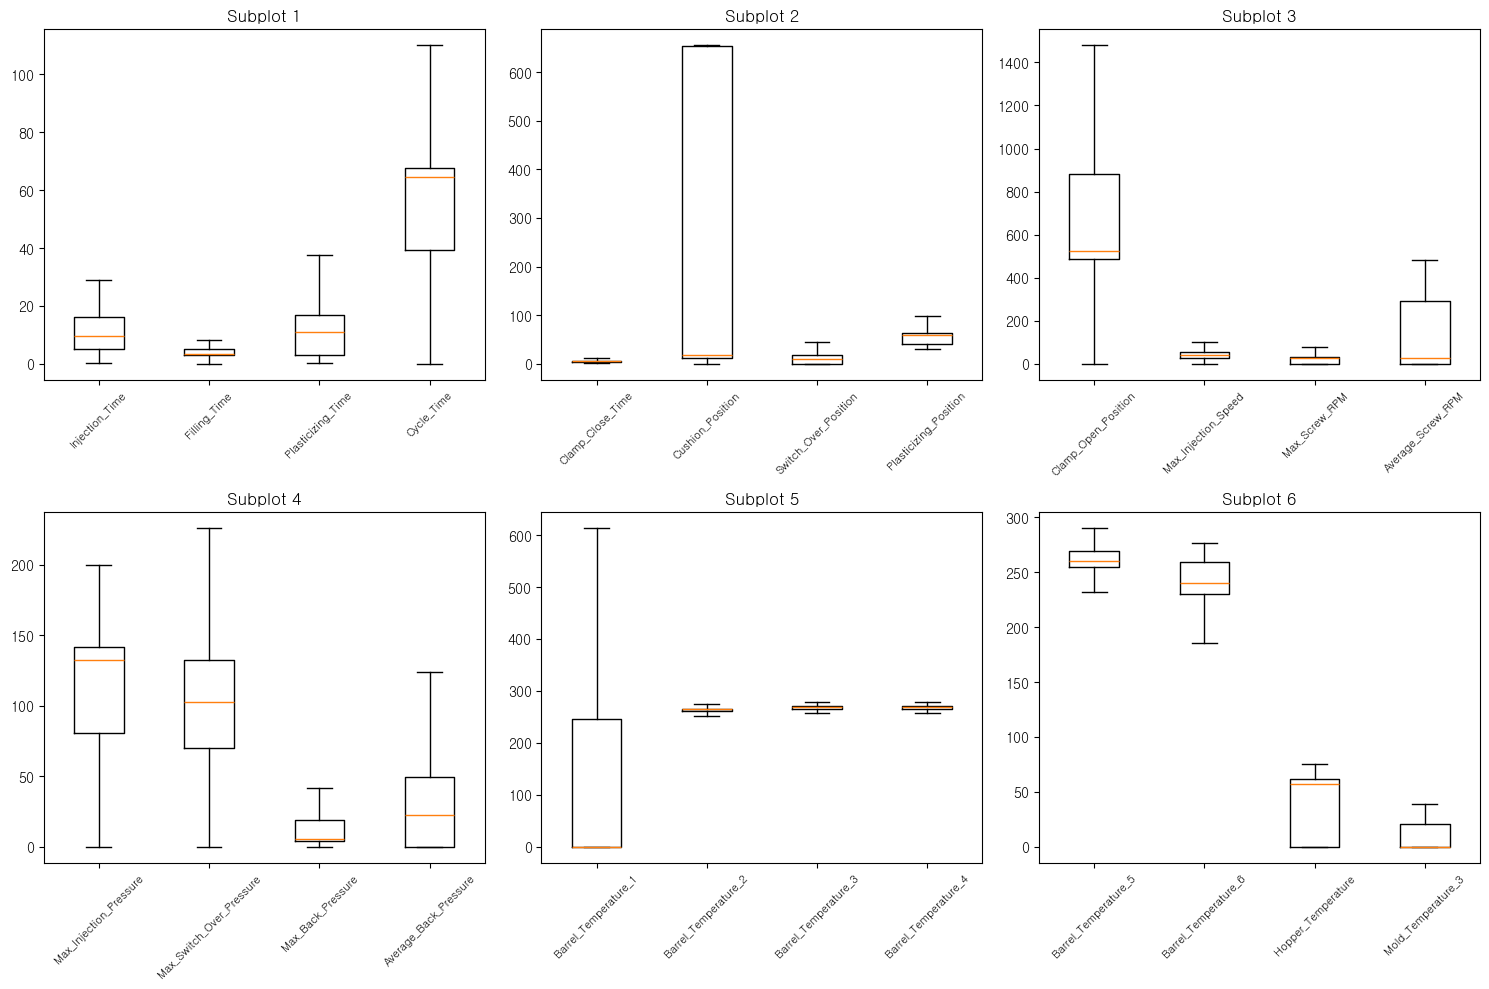

In [157]:
# boxplot으로 이상치 탐색

subset = outlier_clear_final_df

subset = subset.apply(pd.to_numeric, errors='coerce')

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, ax in enumerate(axes):
    start_idx = i * 4
    end_idx = start_idx + 4
    cols = subset.columns[start_idx:end_idx]
    
    data = [subset[col].dropna() for col in cols]
    
    ax.boxplot(data)
    
    ax.set_xticks(range(1, len(cols)+1))
    ax.set_xticklabels(cols, rotation=45, fontsize=8)
    ax.set_title(f'Subplot {i+1}')


plt.tight_layout()
plt.show()

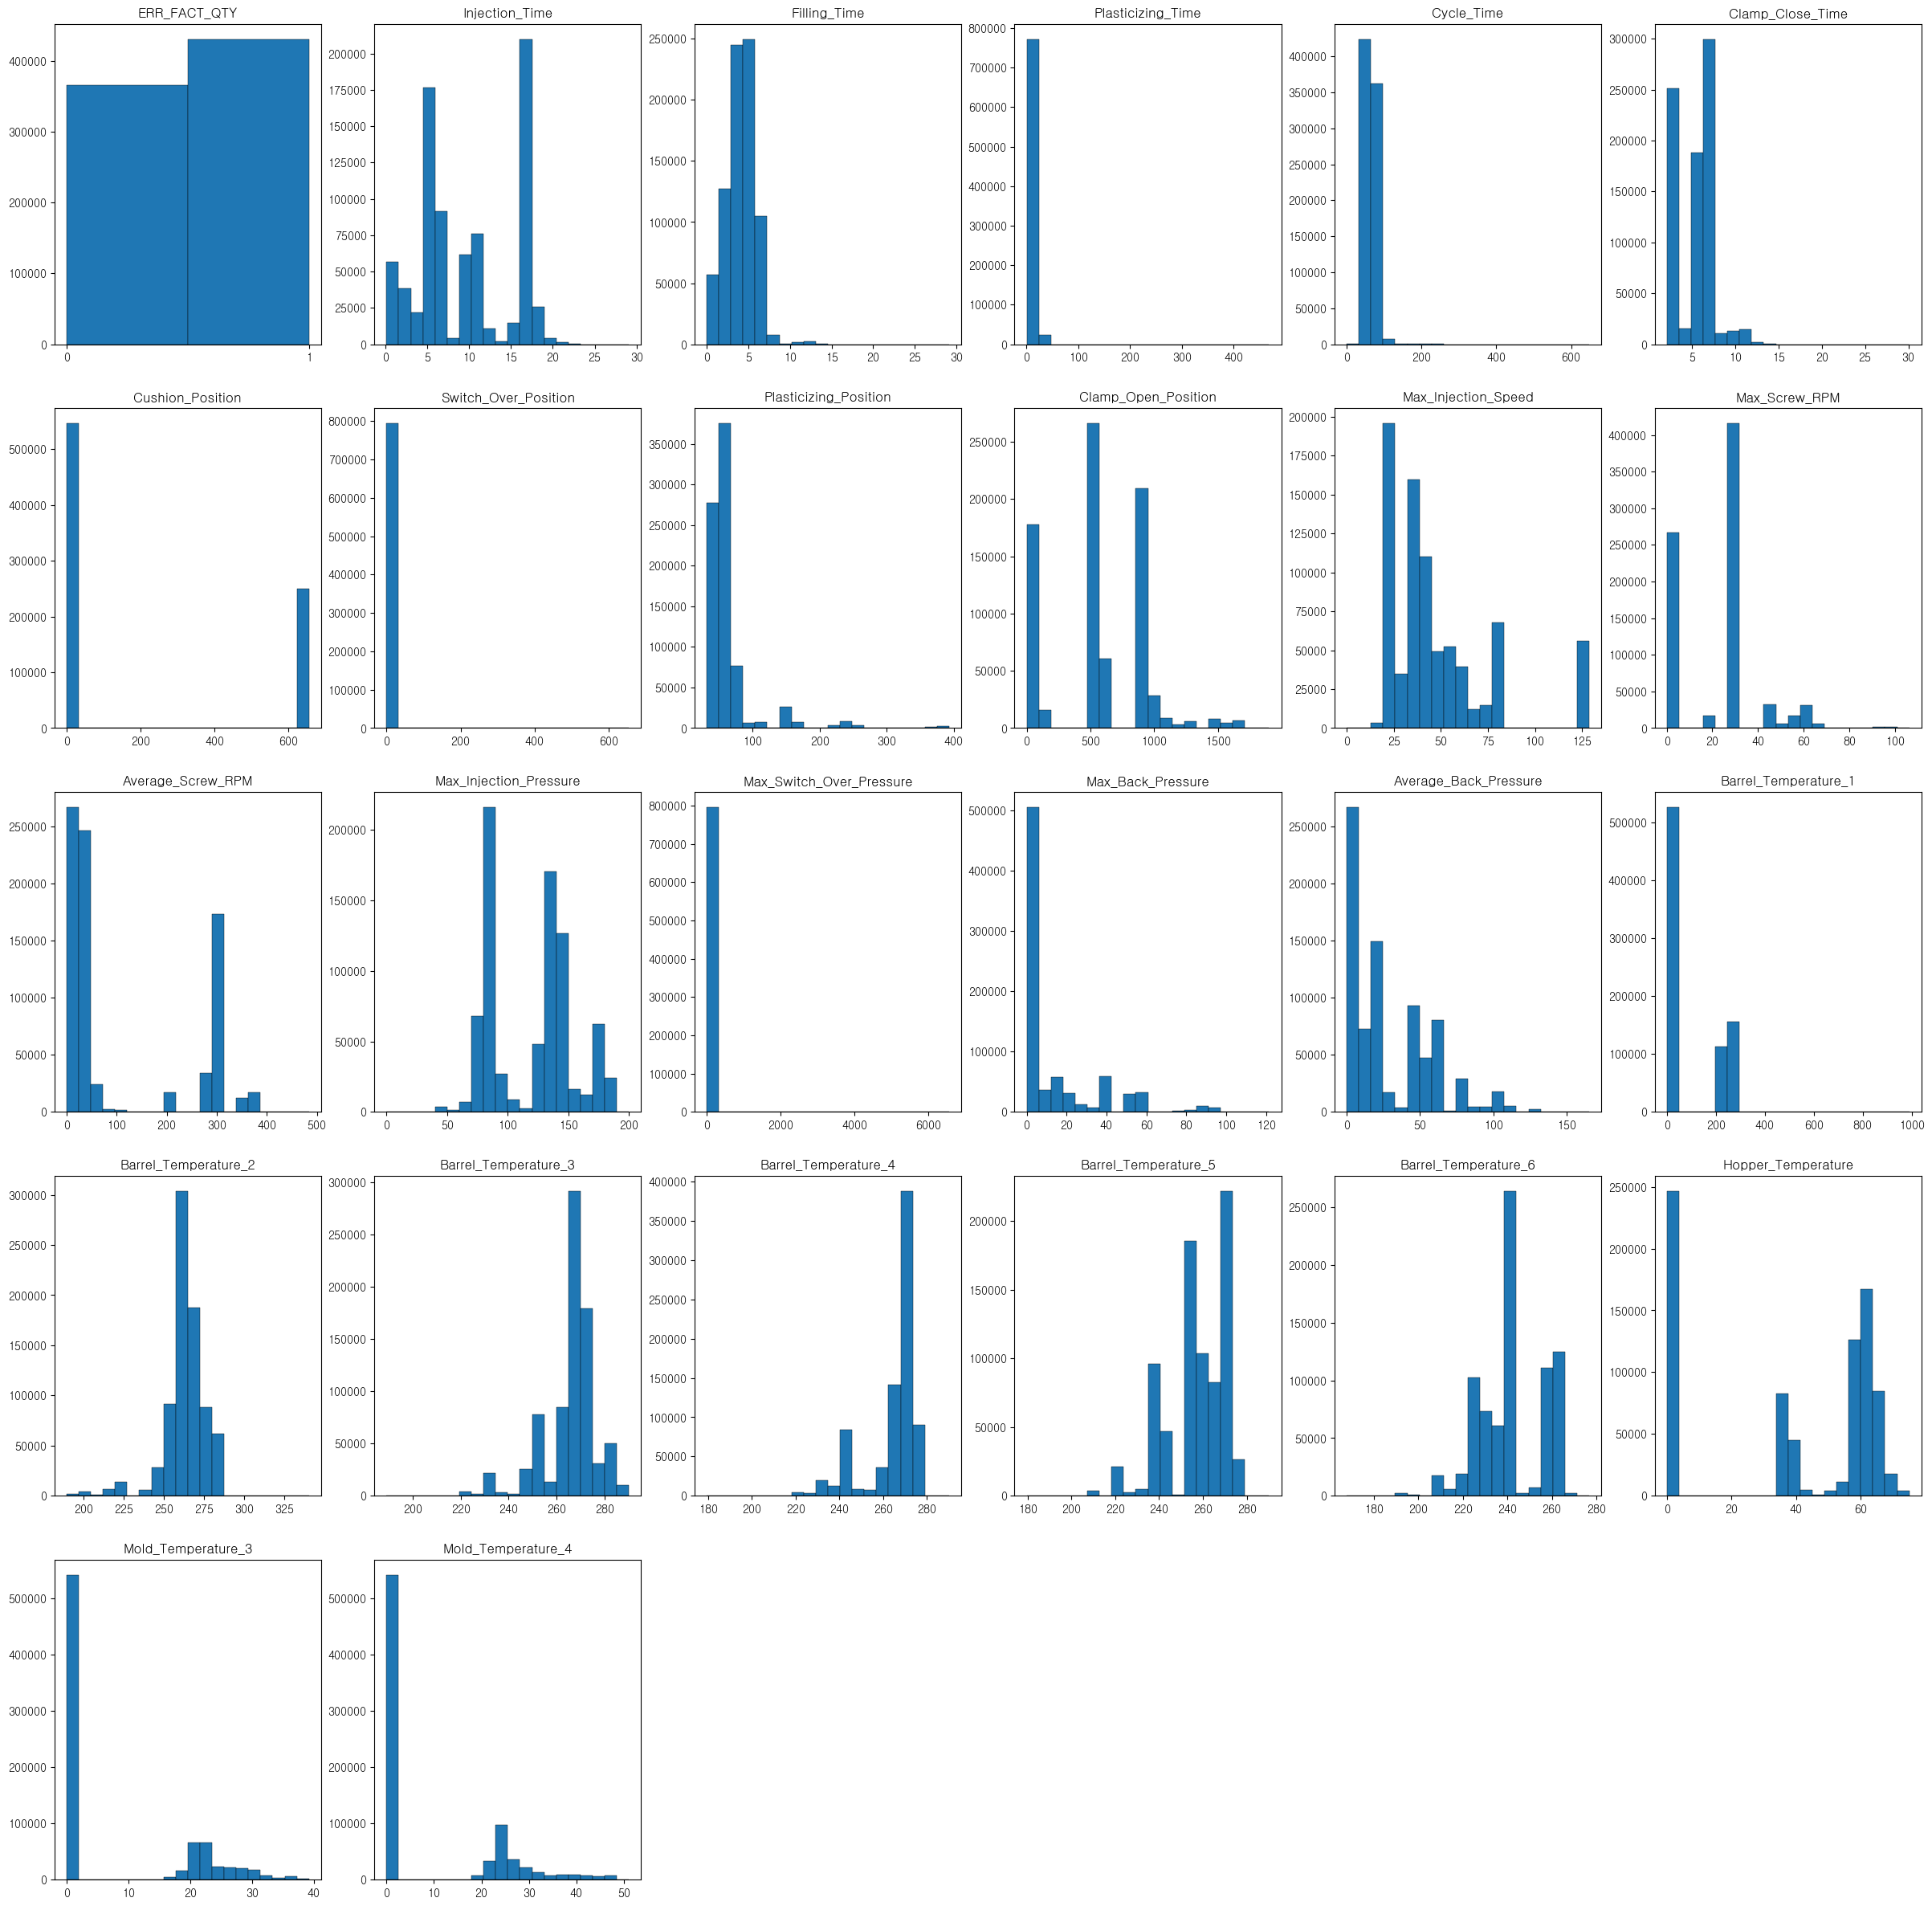

In [143]:
# 분포 확인
plt.figure(figsize=(30, 30))

bin = [2,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20]

for index, value in enumerate(oh_unlabeled_df.iloc[:,3:29]):
        sub = plt.subplot(5, 6, index + 1)
        sub.hist(oh_unlabeled_df[value], bins=bin[index], linewidth=.3, edgecolor='black')
        plt.title(value)